## Football Match Result Prediction - Using Scikit Learn Classifiers

<p>
<strong>
@author Avinash Rai <br/>
@lastmodified 09/03/2021
</strong>
</p>

In [1]:
from sklearn import metrics
from utilities import getTrainTestDataset, cat_3_confusion_matrix

In [2]:
X_train_epl, X_test_epl, y_train_epl, y_test_epl = getTrainTestDataset("pickles\dataset-epl.pickle")
X_train_spl, X_test_spl, y_train_spl, y_test_spl = getTrainTestDataset("pickles\dataset-spl.pickle")

In [3]:
print(X_train_epl.shape)
print(X_train_spl.shape)
print(X_test_epl.shape)
print(X_test_spl.shape)

(1772, 29)
(1775, 29)
(874, 29)
(875, 29)


In [4]:
X_train_epl.head()

,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HTGD,ATGD,DiffPts,DiffFormPts,...,AM5,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,DiffLP
1526,-0.867168,-0.149891,-0.368570,-0.491395,-1.030352,-0.160132,-0.539587,0.291926,-0.945089,-1.174424,...,3,0,0,0,0,1,0,0,0,14
157,0.588288,2.467009,1.524303,1.000785,0.743320,2.278740,-0.783542,1.573927,-1.650598,-1.584578,...,3,0,0,0,0,0,0,0,0,7
1574,0.467000,2.162718,0.375059,1.272091,1.393667,1.921832,0.131290,1.024498,-0.560267,-0.969348,...,3,0,0,0,0,0,0,0,0,4
1850,-1.412963,-1.184480,-1.450211,-1.508791,-1.148597,-1.111887,-0.112666,0.169831,-0.047170,0.056036,...,1,0,0,0,0,0,0,0,0,6
38,-0.260728,0.397832,0.645469,-0.423569,-0.498251,0.553684,-0.844531,0.780307,-1.137501,-0.149041,...,0,0,0,0,0,0,0,0,0,15


In [5]:
X_train_spl.head()

,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HTGD,ATGD,DiffPts,DiffFormPts,...,AM5,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,DiffLP
2020,-1.153904,-1.099911,-1.389243,-1.243118,-0.980697,-0.935257,0.067027,-0.012995,-0.048462,-0.132584,...,1,0,0,0,0,0,0,0,0,2
1143,0.694261,0.728530,1.434441,1.436632,0.923569,0.907177,-0.559609,-0.521091,0.016695,-1.185784,...,1,0,0,1,0,0,0,0,0,1
230,-0.865129,-0.528523,-0.798239,-0.262722,-0.861680,-0.578657,-0.160840,-0.295271,-0.309092,0.288696,...,0,0,0,0,0,0,0,0,0,4
1236,-0.114312,-0.299968,-1.257908,-0.720240,0.507011,-0.281490,0.978498,0.325735,0.863741,1.131256,...,3,0,0,0,0,0,0,0,0,-7
157,-0.980639,-0.757078,-0.404237,-0.197362,-1.040205,-1.113557,-0.616575,-0.577546,0.081852,0.288696,...,3,0,0,0,0,0,0,0,0,-2


## Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression

0.51


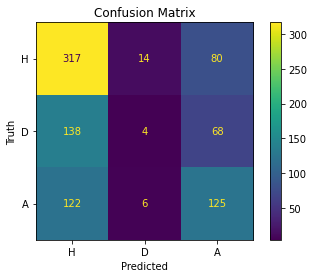

In [7]:
# EPL
LRModel = LogisticRegression(max_iter=1000)
LRModel = LRModel.fit(X_train_epl, y_train_epl.values.ravel())
predictLR = LRModel.predict(X_test_epl)

lr_epl_accuracy = metrics.accuracy_score(y_test_epl.values.ravel(), predictLR)
lr_epl_accuracy = round(lr_epl_accuracy, 2)
print(lr_epl_accuracy)
cat_3_confusion_matrix(LRModel, X_test_epl, y_test_epl.values.ravel() )

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0.5


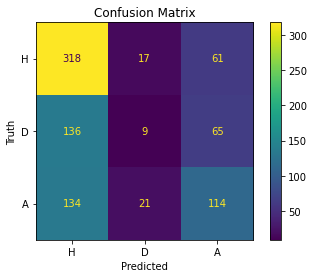

In [8]:
# SPL
LRModel = LogisticRegression(verbose=1, max_iter=1000)
LRModel = LRModel.fit(X_train_spl, y_train_spl.values.ravel())
predictLR = LRModel.predict(X_test_spl)

lr_spl_accuracy = metrics.accuracy_score(y_test_spl.values.ravel(), predictLR)
lr_spl_accuracy = round(lr_spl_accuracy, 2)
print(lr_spl_accuracy)
cat_3_confusion_matrix(LRModel, X_test_spl, y_test_spl.values.ravel() )

## XGBoost Classifier

In [9]:
from xgboost import XGBClassifier

0.53


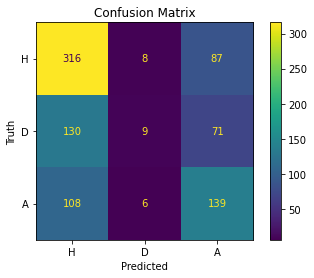

In [10]:
# EPL
XGBModel = XGBClassifier()
XGBModel.fit(X_train_epl, y_train_epl.values.ravel())
predictXGB = XGBModel.predict(X_test_epl)

xgb_epl_accuracy = metrics.accuracy_score(y_test_epl.values.ravel(), predictXGB)
xgb_epl_accuracy = round(xgb_epl_accuracy, 2)
print(xgb_epl_accuracy)
cat_3_confusion_matrix(XGBModel, X_test_epl, y_test_epl.values.ravel() )

0.5


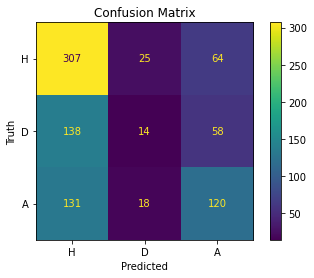

In [11]:
# SPL
XGBModel = XGBClassifier()
XGBModel.fit(X_train_spl, y_train_spl.values.ravel())
predictXGB = XGBModel.predict(X_test_spl)

xgb_spl_accuracy = metrics.accuracy_score(y_test_spl.values.ravel(), predictXGB)
xgb_spl_accuracy = round(xgb_spl_accuracy, 2)
print(xgb_spl_accuracy)
cat_3_confusion_matrix(XGBModel, X_test_spl, y_test_spl.values.ravel() )

### Decision Trees

In [12]:
from sklearn import tree

0.42


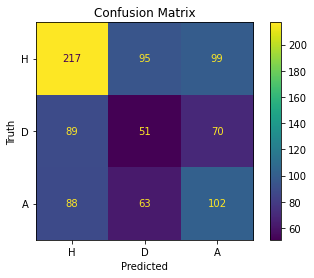

In [13]:
# EPL
DTModel = tree.DecisionTreeClassifier()
DTModel.fit(X_train_epl, y_train_epl.values.ravel())
predictDT = DTModel.predict(X_test_epl)

dt_epl_accuracy = metrics.accuracy_score(y_test_epl.values.ravel(), predictDT)
dt_epl_accuracy = round(dt_epl_accuracy, 2)
print(dt_epl_accuracy)
cat_3_confusion_matrix(DTModel, X_test_epl, y_test_epl.values.ravel() )

0.42


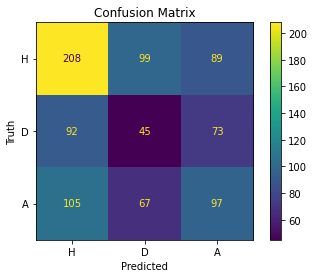

In [14]:
# SPL
DTModel2 = tree.DecisionTreeClassifier()
DTModel2.fit(X_train_spl, y_train_spl.values.ravel())
predictDT2 = DTModel2.predict(X_test_spl)

dt_spl_accuracy = metrics.accuracy_score(y_test_spl.values.ravel(), predictDT2)
dt_spl_accuracy = round(dt_epl_accuracy, 2)
print(dt_spl_accuracy)
cat_3_confusion_matrix(DTModel2, X_test_spl, y_test_spl.values.ravel() )

### Support Vector Machine - Support Vector Classifier

In [15]:
 from sklearn.svm import SVC

[LibSVM]0.54


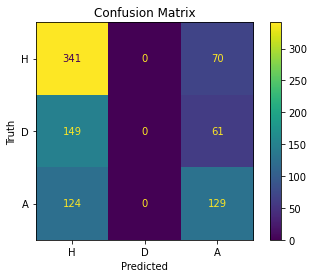

In [16]:
# SPL
SVCModel = SVC( verbose=1, decision_function_shape='ovo',kernel='rbf')
SVCModel.fit(X_train_epl, y_train_epl.values.ravel())
predictSVC = SVCModel.predict(X_test_epl)

svc_epl_accuracy = metrics.accuracy_score(y_test_epl.values.ravel(), predictSVC)
svc_epl_accuracy = round(svc_epl_accuracy, 2)
print(svc_epl_accuracy)
cat_3_confusion_matrix(SVCModel, X_test_epl, y_test_epl.values.ravel() )

[LibSVM]0.53


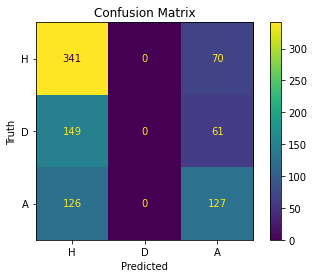

In [17]:
# SPL
SVCModel2 = SVC( verbose=1, decision_function_shape='ovo',kernel='rbf')
SVCModel2.fit(X_train_spl, y_train_spl.values.ravel())
predictSVC2 = SVCModel2.predict(X_test_spl)

svc_spl_accuracy = metrics.accuracy_score(y_test_spl.values.ravel(), predictSVC2)
svc_spl_accuracy = round(svc_spl_accuracy, 2)
print(svc_spl_accuracy)
cat_3_confusion_matrix(SVCModel2, X_test_epl, y_test_epl.values.ravel() )

## Summary

In [18]:
from IPython.display import HTML, display
html = '<table style="font-size:14px">'
html += "<tr><th>ML Classification Algorithms</th><th>EPL</th><th>SPL</th></tr>"
html += "<tr> <td>Logistic Regression</td> <td>"+str(round(lr_epl_accuracy,2))+"</td> <td> "+str(round(lr_spl_accuracy,2))+"</td>" 
html += "<tr> <td>XGBoost Classifier</td> <td>"+str(round(xgb_epl_accuracy,2))+"</td> <td> "+str(round(xgb_spl_accuracy,2))+"</td>" 
html += "<tr> <td>Decision Tree Classifier</td> <td>"+str(round(dt_epl_accuracy,2))+"</td> <td> "+str(round(dt_spl_accuracy,2))+"</td>" 
html += "<tr> <td>Support Vector Classifier</td> <td>"+str(round(svc_epl_accuracy,2))+"</td> <td> "+str(round(svc_spl_accuracy,2))+"</td>" 

html += "</table>"

display(HTML(html))

ML Classification Algorithms,EPL,SPL
Logistic Regression,0.51,0.5
XGBoost Classifier,0.53,0.5
Decision Tree Classifier,0.42,0.42
Support Vector Classifier,0.54,0.53
